<h6 align=right> 🐍 Python akademie - lekce 8 - 19.04.2023</h6>

<br>

# <h1 align=center><font color=black size=24><b> 08_03: Rámce (~scopes)</font></h1>

<br>



<br>

---

### **Zajímavé odkazy z této lekce:**

* [Real Python](https://realpython.com/python-scope-legb-rule/)
* [Programiz](https://www.programiz.com/python-programming/global-local-nonlocal-variables)
* [Oficiální dokumentace - pokročilé](https://docs.python.org/3/tutorial/classes.html)

---

<br>

*Scope* nebo také *rámec* je koncept, na kterém pracuje spousta programovacích jazyků, Python není výjimkou.

Rámec v podstatě řeší tuto otázku: **"K jakým proměnným mám v tuto chvíli přístup?"**

<br>

---

<br>

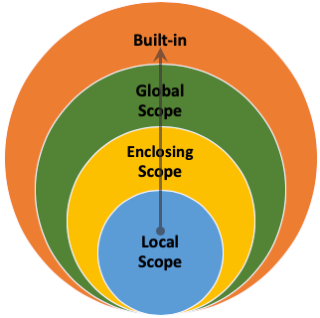

<br>

## 🌍 **Globální rámec**

---

In [1]:
print(jmeno)

NameError: name 'jmeno' is not defined

<br>

Po spuštění předchozí buňky s funkcí `print` dostaneme chybu s argumentem: `name 'jmeno' is not defined`.

Důvodem je absence proměnné `jmeno`. 

Nebo také řečeno, proměnná `jmeno` se nenachází v aktuálním *rámci*.

<br>

In [2]:
jmeno = "Jagr"

In [3]:
print(jmeno)

Jagr


<br>

Nyní jsme vytvořili odkaz na hodnotu `"Jagr"`.

<br>

Tím jsme současně v našem **globálním rámci** nachystali proměnnou `jmeno`, kterou mohu v jakémkoliv okamžiku po jejím zapsání použít (uvnitř podmínek, funkcí, cyklů, tříd, ...).

<br>

Ověřit si, které proměnné máme dostupné v aktuálním **globalním rámci** můžeme pomocí funkce `globals`:

In [4]:
from pprint import pprint as pp

In [5]:
pp(globals())

{'In': ['',
        'print(jmeno)',
        'jmeno = "Jagr"',
        'print(jmeno)',
        'from pprint import pprint as pp',
        'pp(globals())'],
 'Out': {},
 '_': '',
 '__': '',
 '___': '',
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__loader__': None,
 '__name__': '__main__',
 '__package__': None,
 '__spec__': None,
 '_dh': ['C:\\Users\\Radim '
         'Jedlicka\\Documents\\ENGETO\\LEKTOR\\Python_Akademie\\Courses\\in_progress\\lekce_08'],
 '_i': 'from pprint import pprint as pp',
 '_i1': 'print(jmeno)',
 '_i2': 'jmeno = "Jagr"',
 '_i3': 'print(jmeno)',
 '_i4': 'from pprint import pprint as pp',
 '_i5': 'pp(globals())',
 '_ih': ['',
         'print(jmeno)',
         'jmeno = "Jagr"',
         'print(jmeno)',
         'from pprint import pprint as pp',
         'pp(globals())'],
 '_ii': 'print(jmeno)',
 '_iii': 'jmeno = "Jagr"',
 '_oh': {},
 

In [6]:
print(globals()['jmeno'])

Jagr


<br>

## **Lokální rámec**

---

In [7]:
def moje_funkce():
    sport = "hokej"

In [8]:
moje_funkce()

In [9]:
print(sport)

NameError: name 'sport' is not defined

<br>

`name 'sport' is not defined`. 

Tentokrát však máme proměnnou `jmeno` předepsanou.

<br>

Proměnná `sport` tentokrát existuje, ale v **lokálním rámci**, tedy uvnitř funkce `moje_funkce`.

Co funkce, to nový lokální rámec. **Lokální rámec** není **globalní rámec**. Proto nemůžeme použít proměnnou `sport` v globálním rámci, pokud je vytvořená v lokálním rámci.

<br>

Každá funkce ma svůj vlastní **lokální rámec**. Jednotlivé lokální rámce jsou izolované (nevidí proměnné ostatních).

<br>

In [10]:
zelenina = "MRKEV"

def moje_funkce():
    zelenina = "brambor"

print(zelenina)

MRKEV


In [11]:
print(globals()['zelenina'])

MRKEV


In [12]:
zelenina = "MRKEV"

def moje_funkce():
    zelenina = "brambor"
    print(zelenina)

moje_funkce()

brambor


<br>

Lokální rámce souvísí s funkcemi. Nestačí pokud je zápis např. **odsazený**.

In [13]:
jmeno = "Dominik"

if jmeno == "Dominik":
    prijmeni = "Hasek"

def funkce():
    jmeno = "Dominik"


print(prijmeni)

Hasek


In [14]:
print(globals()["prijmeni"])

Hasek


<br>

Pokud potřebujeme zpřístupnit proměnnou `jmeno` uvnitř funkce, musím použít funkci `print` v daném lokálním rámci:

In [15]:
jmeno = "Ferda"

def funkce():
    jmeno = "Pytlik"
    print(jmeno)


funkce()


Pytlik


<br>

Pokud chcete ověřit, jaké proměnné máte v daném lokalním prostředí dostupné, použijte uvnitř konkrétního prostředí funkci `locals`:

In [16]:
jmeno = "Kazi"

def funkce_1():
    jmeno = "Teta"
    print(f'Lokalni ramec: {locals()}')

def funkce_2():
    jmeno = "Libuse"
    print(f'Lokalni ramec: {locals()}')
    
print('Globalni ramec:', globals()['jmeno'])
funkce_1()
funkce_2()

Globalni ramec: Kazi
Lokalni ramec: {'jmeno': 'Teta'}
Lokalni ramec: {'jmeno': 'Libuse'}


Pokud budeš mít uživatelských funkcí víc, můžeš pozorovat, jak žádná nevidí do jiné funkce:

In [ ]:
def zapis_zahlavi(jmeno):
    datum = "11/11/2011"
    print("Lokální rámec 'zapis_zahlavi':", locals())
    return f"{datum}-{jmeno}"

In [ ]:
def zapis_zpravu(hlavicka, text):
    print("Lokální rámec 'zapis_zpravu':", locals())
    return f"{hlavicka}: {text}"

In [ ]:
zahl = zapis_zahlavi("Radim")

In [ ]:
zprava = zapis_zpravu(zahl, "Ahoj všichni!")

Tudíž nejsi obyčejně schopen ve funkci `zapis_zpravu` použít parametr `jmeno` atd.

<br>

## 🧱 **Zabudovaný rámec (~built-in scope)**

---

Tento rámec obsahuje všechny výjimky, zabudované funkce a většinu základních datových typů.

In [17]:
print(sum)

<built-in function sum>


<br>

Máme jej k dispozici okamžitě pod spuštění interpretu, takže můžeme použít objekty, které má k dispozici.

In [18]:
import builtins

In [19]:
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

<br>

## **Uzavírající rámec (enclosing scope)**

---

🔫 Jde o téma pouze **pro ostřílenější pythonisty.**

Celé to vypadá jako jedna *uživatelská funkce* **zanořená** (nestovaná) do jiné *uživatelské funkce*:

In [20]:
def rozdel_podle_znaku(adresa, znak="@"):  # Lokální + Uzavírající rámec
    rozdeleny_mail = adresa.split(znak)
    
    def oddel_domenu(nedomena, znak="."):  # Lokální rámec
        return nedomena[1].split(znak)[0]
    
    return oddel_domenu(rozdeleny_mail) 

In [21]:
rozdel_podle_znaku("radim@gmail.com")

'gmail'

V předchozím příkladu máme 2 lokalní rámce, kdy do jednoho patří `oddel_domenu` a  do druhého `rozdel_podle_znaku`. Současně funkce `rozdel_podle_znaku` patří do uzavírajícího rámce. Dále proměnná `rozdeleny_mail` není v příkladu výše **lokální** proměnná, ale **nelokální** proměnná, protože je definována v rámci uzavírajícího rámce.

In [22]:
oddel_domenu()

NameError: name 'oddel_domenu' is not defined

Samotnou vnitřní funkci `oddel_domenu` nelze spustit. Tu lze spustit pouze za pomocí spuštění uzavírající funkce `rozdel_podle_znaku`:

Aplikace této složitější tématiky pak lze dohledat u:

1. Closures,
2. [*dekorátorů*](https://gist.github.com/Bralor/ea1c0a0430aacf2f71625ee8be1c1ddd).

<br>

## **Shrnutí rámců**

---

Proč je tedy znalost a pochopení pravidel rámců tak důležitá?

In [ ]:
prostredi = "globalni"

def funkce_a():
    prostredi = "uzavirajici"

    def funkce_b():
        prostredi = "lokalni"
        print(prostredi)

    funkce_b()
funkce_a()

In [ ]:
prostredi = "globalni"

def funkce_a():
    prostredi = "lokalni"
    # print(locals())
    print(globals()["prostredi"])

funkce_a()

Struktura rámců umožňuje hierarchické hledání proměnných:

1. Nejprve prohledá **lokalní** rámec, v němž se nachází,
2. Pokud není uvnitř, zkus **uzavírající** rámec nebo obecně nadřazený rámec,
3. Pokud není uvnitř uzavírajícího prostředí, zkus **globální** rámec,
4. Pokud neni uvnitř globálního, zkus **zabudovaný** rámec,
5. Pokud není uvnitř zabudovaného rámce -> `NameError`

Spoléhat však na toto chování není doporučováno. Je totiž neintuitivní.

Proto je dobré pamatovat na poučku, že **pěkná uživatelská funkce** umí pracovat pouze:
1. svými **proměnnými**,
2. svými **parametry**.